# Multi-Layer Perceptron (MLP)

This notebook implements the custom multi-layer Perceptron on the Breast Cancer Wisconsin dataset. Here, MLP is used to classify tumors into malignant or benign based on input data for various numerical features. The objective of this task is to validate the use of the custom MLP, and evaluate its performance for a multi-feature classification problem.

The following sections are included in this notebook:
1. **Library Imports**
- Importing the necessary modules, packages, and libraries
- Specifies dependencies and preferred versions
2. **Data Loading and Cleaning**
- Loads the Breast Cancer Wisconsin dataset with relevant features
- Drops duplicates and missing data
- Creates arrays for the features and target variable
3. **Data Visualization**
- Visualizes the correlation between features using a heatmap
- Visualizes the distribution of two features with the target on a 2D color plot
4. **MLP Implementation (2 Features)**
- Implements the custom-built MLP with two input features  
- Visualizes the classification  
- Evaluates the results across multiple metrics  
5. **MLP Implementation (Changing Parameters)**
- Implements the custom-built MLP with various parameters (number of hidden layers, number of epochs, and learning rate)
- Examines the effect on model performance
6. **MLP Implementation (Multiple Features)**
- Implements the custom-built MLP with more than two features to ensure functionality
- Evaluates the results across multiple metrics
7. **Comparison with Existing Models**
- Runs the scikit-learn version of MLP
- Compares the results with the custom-built class to verify the latter

*For a more comprehensive overview of the MLP algorithm, code structure, and metrics used, see the associated [README](README.md).*

### Library Imports
This section imports the packages and modules required to run the MLP. The following dependencies (with recommended versions) are required:
- Python 3.9.6
- Numpy 1.26.4
- Pandas 2.3.3
- Matplotlib 3.9.4
- Seaborn 0.13.2
- Sklearn 1.6.1

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rice_ml.preprocess import *
from rice_ml.supervised_learning.perceptron import *
from rice_ml.postprocess.classificationpost import *
import sklearn

### Data Loading and Cleaning
*Loading, preprocessing, and dividing data*

The data used in this notebook comes from Breast Cancer Wisconsin, a common dataset for evaluating classification algorithms. It has been selected for its number of features and clear relationships, and because it allows for several data cleaning steps that showcase the `rice_ml` preprocessing modules. The features of interest in this example are *target* (numeric encoding of a categorical value and the target variable for classification), as well as a range of numeric features relating to tumor characteristics.

The data is first loaded as a Pandas DataFrame. For classification, the *target* feature has been converted to discrete integer values, with 0 representing a malignant tumor and 1 representing a benign tumor.

In [62]:
# Loading the basic dataset
cancer_data = sklearn.datasets.load_breast_cancer(as_frame = True)
cancer_data = cancer_data.frame
display(cancer_data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


To ensure that the dataset does not contain missing data, we apply a series of preprocessing steps using functions from the `preprocess` package, including dropping any rows with missing values or that are identified to be duplicates of another.

In [63]:
# Cleaning the dataset (dropping rows that are duplicates or contain missing data)
cancer_data_missing = missing_data(cancer_data, 'drop')
cancer_data_cleaned = duplicate_identify(cancer_data_missing, True)

We then split the dataset into the target variable and the other features. The target variable for classification in this dataset is "target", which indicates the presence (0) or absence (1) of breast cancer.

In [64]:
# Creating two arrays
cancer_features = cancer_data_cleaned[:, :-1]
cancer_status = cancer_data_cleaned[:, -1]
print(f"Array for features (first five entries, first five features): \n {cancer_features[0:5, 0:5]} \n \n \
Array for presence/absence of cancer (first five rows): \n {cancer_status[0:5]}")

Array for features (first five entries, first five features): 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]] 
 
 Array for presence/absence of cancer (first five rows): 
 [0. 0. 0. 0. 0.]


### Data Visualization
*Correlations and feature plotting*

Once the data has been appropriately cleaned, the relationships between variables can be visualized using a set of methods. We first visualize the correlations between features using a heatmap of a calculated correlation matrix, applied to the cleaned DataFrame that includes all possibly relevant features. Doing so allows for the identification of features that are correlated with the target, and may thus be appropriate for classification using MLP.

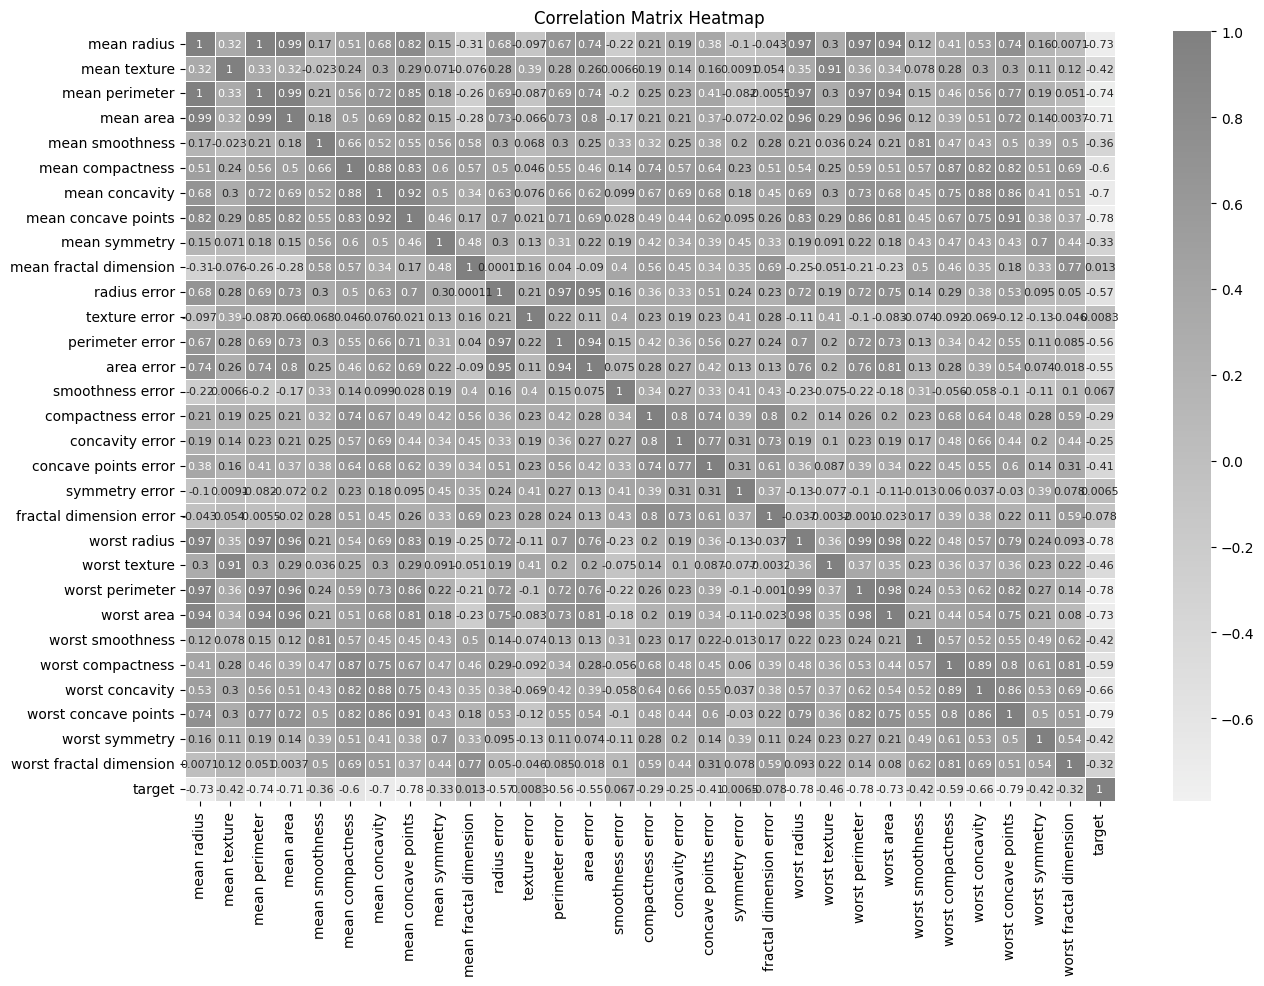

In [65]:
# Creating and plotting a correlation matrix with a heatmap
correlation_matrix = (pd.DataFrame(cancer_data_cleaned, columns = cancer_data.columns)).corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8}, cmap = sns.light_palette('gray', as_cmap=True), linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The target feature appears to be somewhat correlated with mean texture (-0.42) and mean compactness (-0.6). Consequently, these features are appropriate for MLP, and we select them as the features to be used for cancer classification. To visualize the relationship between the three variables (*mean texture*, *mean compactness*, and *target*) and identify possible clusters prior to formal analysis, we can create a two-dimensional plot of mean compactness versus mean texture, with colors indicating tumor type.


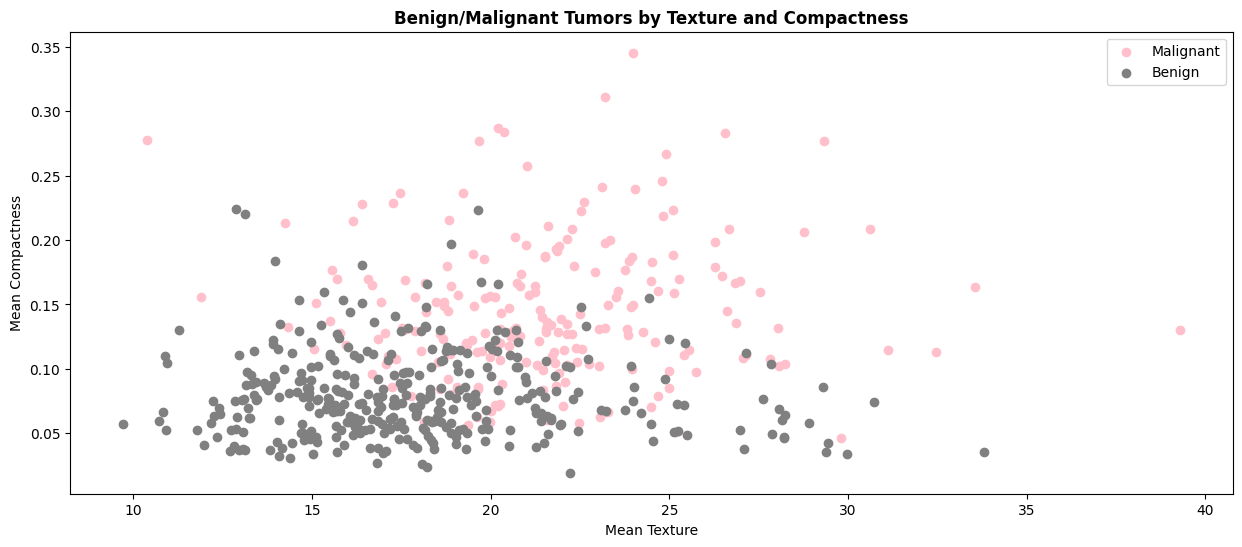

In [66]:
# Plotting mean texture and compactness, color-coded by target
colors = {0: 'pink', 1: 'gray'}

plt.figure(figsize = (15, 6))
for target in np.unique(cancer_status):
    mask = (cancer_status == target)
    plt.scatter(cancer_features[mask, 1], cancer_features[mask, 5], label = cancer_status, color = colors[target])
    
plt.legend(['Malignant', 'Benign'])
plt.title("Benign/Malignant Tumors by Texture and Compactness", fontweight = 'bold')
plt.xlabel("Mean Texture")
plt.ylabel("Mean Compactness")

plt.show()

The distribution of tumor type appears to fall into two primary clusters. Benign tumors have less significant texture and lower compactness, while malignant tumors tend to be more compact and more textured, with some overlap between the two. The distribution of this data and the presence of seemingly visible clusters suggest that it will be a meaningful task for evaluating the custom MLP.

### MLP Implementation (2 Features)
*Classification using MLP with two features*

This section implements the custom MLP class to classify tumor type based on compactness and texture. It carries out the standardization, splitting, model fit, and prediction calculations.

Prior to fitting the MLP model, we normalize the feature data using z-scores for each feature, calculated using the `preprocess` package. This reduces the possibility that the relative scale of the feature will impact model results, and is standard practice in supervised learning. Feature normalization rescales each feature to prevent skewing results based on feature magnitude, ensuring that no one feature will overly contribute to model predictions.

In [67]:
# Standardizing the data
cancer_data_normal = z_score_standardize(cancer_features[:, [1, 5]])
print(f"Standardized feature data (first five rows): \n {cancer_data_normal[0:5, :]}")

Standardized feature data (first five rows): 
 [[-2.07333501  3.28351467]
 [-0.35363241 -0.48707167]
 [ 0.45618695  1.05292554]
 [ 0.25373211  3.40290899]
 [-1.15181643  0.53934045]]


Once the data has been scaled, it is split into testing and training arrays. This ensures that the model is not trained and tested on the same set of data, allowing for unbiased evaluation of model performance and preventing overfitting. The data is split in a 70/30 proportion such that the training data is 70% of the total dataset, and the testing data 30%. There are 569 samples in the cleaned dataset, so the training array should have approximately 398 samples and the testing should have 171.

Because this is a classification problem where the classes may not be evenly represented within the data, stratification is used to split the testing and training sets. Stratification is a division method that first groups the data based on a given label, then randomly samples from each group to ensure that they are proportionally represented in both the testing and training data. This method prevents significant bias arising from disproportionate class counts by preserving relative distributions and ensuring that each class is represented in the training data. In this case, the stratification method is based on the target (*target*), which should guarantee that samples from each tumor type are present in each set.

In [68]:
# Splitting the data into training and testing arrays
train_array, test_array, train_targets, test_targets = train_test(cancer_data_normal, cancer_status, stratify = cancer_status, random_state = 438)
train_targets = train_targets.reshape(-1, 1)

# Verifying sizes of each array
print(f"Shape of training array: {train_array.shape}")
print(f"Shape of training targets: {train_targets.shape}")
print(f"Shape of testing array: {test_array.shape}")
print(f"Shape of testing targets: {test_targets.shape}")

Shape of training array: (398, 2)
Shape of training targets: (398, 1)
Shape of testing array: (171, 2)
Shape of testing targets: (171,)


We now perform classification using MLP by creating an instance of the `multilayer_Perceptron` class from the supervised learning package, and fitting it on the training data. The previously unseen test data is then provided to the fitted model to predict the tumor type labels. 

This MLP has the following specifications:
- **Layers:** 2, 2, 1
- **Epochs:** 1000
- **Learning Rate:** 0.01

In [69]:
mlp = multilayer_Perceptron([2, 2, 1])
mlp.fit(train_array, train_targets.reshape(-1, 1))
pred, classes = mlp.prediction(test_array)

When the model has been successfully fitted and returns the tumor type predictions for the test data, we evaluate its performance using a variety of visualization and scoring methods. These include plotting the predictions, displaying the overall confusion matrix, and calculating accuracy, precision, recall, F1, and log loss scores for each class, as well as plotting the error count over epochs. For a description of these metrics, see this [README](README.md).

The plot below is a visualization of MLP accuracy on the test data. The leftmost subplot displays the overall distribution of tumor texture and compactness, color-coded for tumor type; pale points are all data, and darker points indicate the gold-standard target labels for the test dataset. The rightmost subplot displays the same data, but with points that have been incorrectly classified by the MLP in yellow.

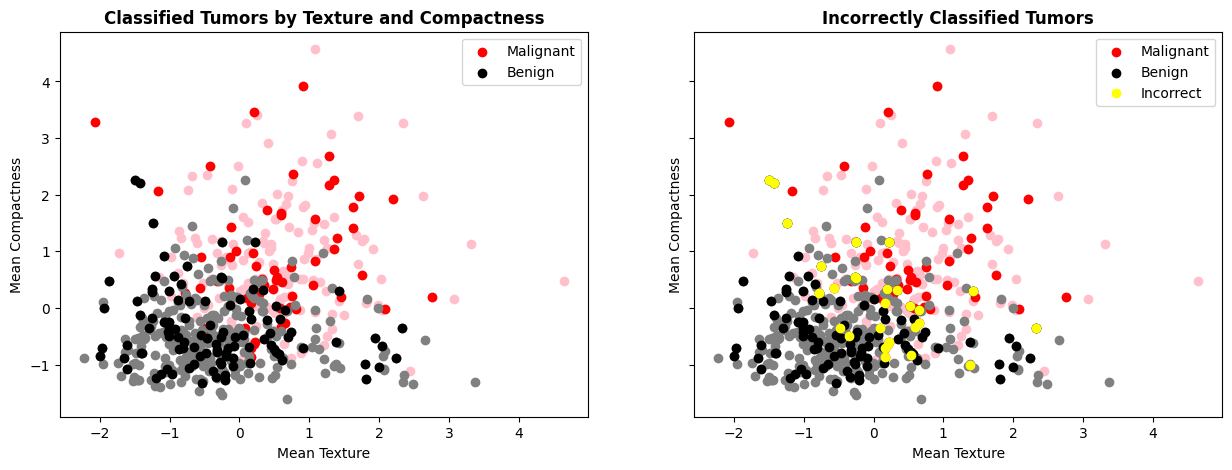

In [70]:
# Plotting mean texture and compactness for correct and predicted values, color-coded by target
colors = {0: 'pink', 1: 'gray'}
colors_2 = {0: 'red', 1: 'black'}

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

for target in np.unique(cancer_status):
    mask = (cancer_status == target)
    ax[0].scatter(cancer_data_normal[mask, 0], cancer_data_normal[mask, 1], label = target, color = colors[target])
    ax[1].scatter(cancer_data_normal[mask, 0], cancer_data_normal[mask, 1], label = target, color = colors[target])
    mask_new = (test_targets == target)
    ax[0].scatter(test_array[mask_new, 0], test_array[mask_new, 1], label = target, color = colors_2[target])
    ax[1].scatter(test_array[mask_new, 0], test_array[mask_new, 1], label = target, color = colors_2[target])

mask_incorrect = (test_targets != classes.reshape(-1,))
ax[1].scatter(test_array[mask_incorrect, 0], test_array[mask_incorrect, 1], label = target, color = 'yellow')

ax[0].set_title("Classified Tumors by Texture and Compactness", fontweight = 'bold')
ax[1].set_title("Incorrectly Classified Tumors", fontweight = 'bold')

for i in range(2):
    ax[i].set_xlabel("Mean Texture")
    ax[i].set_ylabel("Mean Compactness")

handles, labels = plt.gca().get_legend_handles_labels()
selected_handles = [handles[i] for i in [1, 3]]
selected_handles_2 = [handles[i] for i in [1, 3, 4]]
ax[0].legend(handles = selected_handles, labels = ['Malignant', 'Benign'])
ax[1].legend(handles = selected_handles_2, labels = ['Malignant', 'Benign', 'Incorrect'])

plt.show()

The custom MLP has fairly good accuracy for tumor type classification, with several points in the overlap between clusters misclassified. For a more quantitative evaluation of the model, we plot the confusion matrix for each class, and produce the numerical evaluation metrics (accuracy, recall, precision, and F1 scores on the micro and macro scale, as well as log loss).

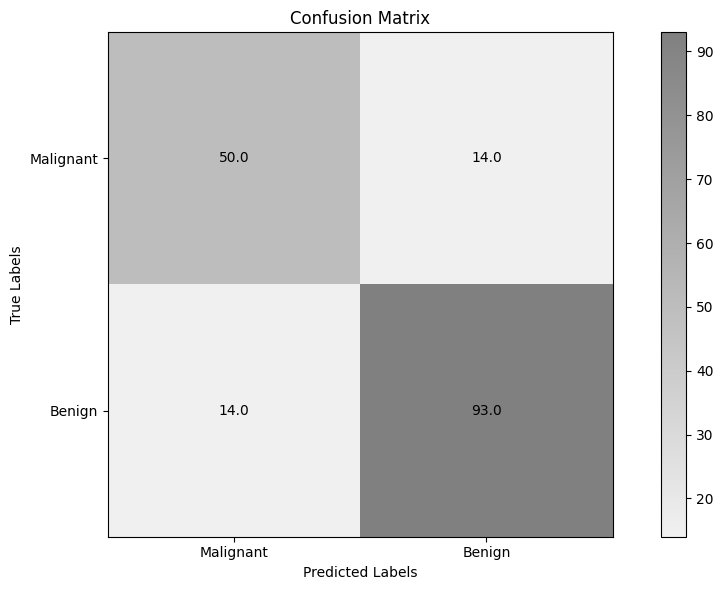

In [71]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(classes.reshape(-1,), test_targets, conf_matrix_labels = ['Malignant', 'Benign'])

In [72]:
# Evaluating model performance on various metrics
print_model_metrics(classes.reshape(-1,), test_targets)
print(f"Loss: {log_loss(pred, test_targets):.2f}")

Model Metrics 
------------- 
Accuracy: 0.84 
Precision (Micro): 0.84 
Precision (Macro): 0.83 
Recall (Micro): 0.84 
Recall (Macro): 0.83 
F1 (Micro): 0.84 
F1 (Macro): 0.83
Loss: 0.39


The evaluation results of the model indicate that it is fairly successful in classifying tumor type given the two input features. The accuracy is around 83%, with similar values for precision, recall, and F1. The log loss is fairly low (0.42), indicating relatively good performance on the test data. Moreover, the confusion matrix verifies that most samples were classified correctly, with an almost equal number of misclassifications for each label.

We can plot the error history of the MLP over epochs to observe whether the model is learning appropriately.

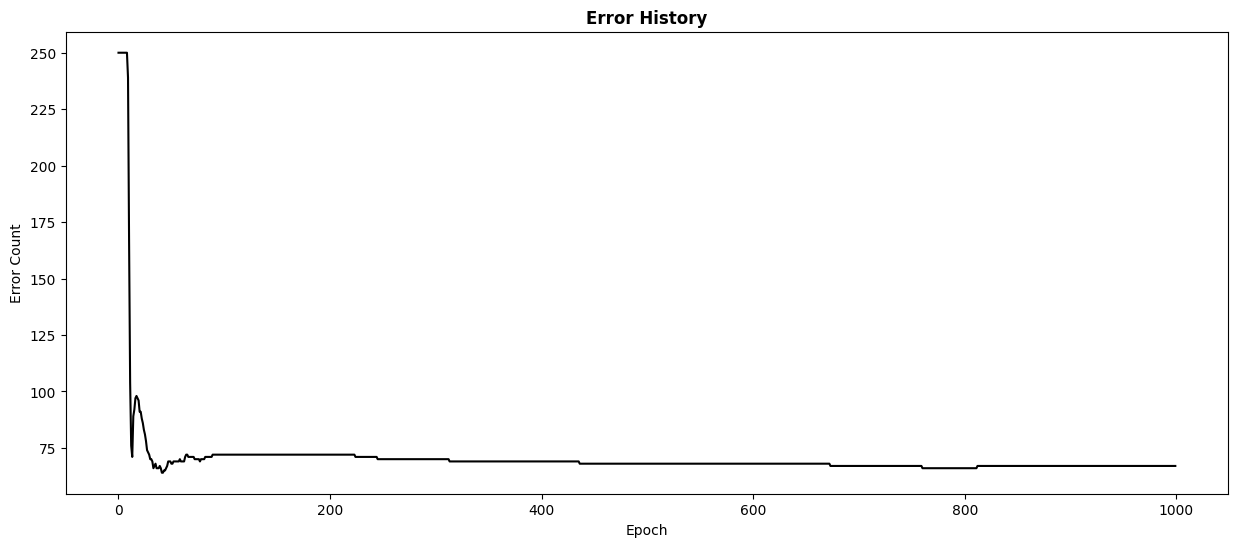

In [73]:
# Plotting the error history
errors = mlp.error_
iteration = np.arange(mlp.epochs)
plt.figure(figsize = (15, 6))
plt.plot(iteration, errors, 'black')
plt.title("Error History", fontweight = 'bold')
plt.xlabel("Epoch")
plt.ylabel("Error Count")
plt.show()

The error count for the model decreases significantly as the epoch count increases. The error count is initially high, then drops steeply until around 100 epochs, where it begins to level off and is only reduced slightly as the number of epochs increases. This is indicative of the success of the model; it is appropriately updating weights and biases to reduce errors, an improvement from the [single-layer Perceptron](../perceptron/perceptron_example.ipynb).

### MLP Implementation (Changing Parameters)
*Altering hidden layer count, number of epochs, and learning rate*

This section implements the custom MLP for classifying tumor type based on mean texture and mean compactness, but systematically changes a parameter in the model to determine the effects on performance. It first evaluates the model for different numbers of hidden features, using accuracy as the primary metric.

In [74]:
# Arrays for number of hidden layers and accuracy
layer_values = [[2, 2, 1], [2, 2, 2, 1], [2, 2, 2, 2, 1], [2, 2, 2, 2, 2, 1], [2, 2, 2, 2, 2, 2, 1], [2, 2, 2, 2, 2, 2, 2, 1]]
accuracy_values_layers = np.full(len(layer_values), np.nan)

# Fitting and scoring the model for each layer number
for i in range(len(layer_values)):
    mlp = multilayer_Perceptron(layers = layer_values[i])
    mlp.fit(train_array, train_targets)
    prob, classes = mlp.prediction(test_array)
    accuracy = accuracy_score(classes.reshape(-1,), test_targets)
    accuracy_values_layers[i] = accuracy

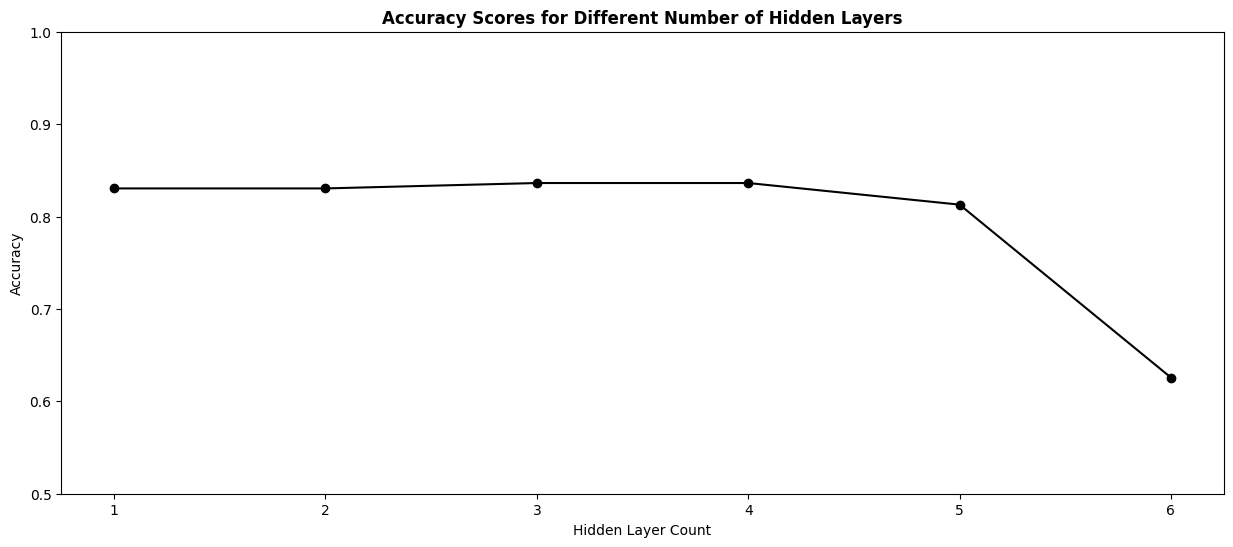

In [75]:
# Plotting the change in accuracy across different number of hidden layers
plt.figure(figsize = (15, 6))
plt.plot(np.arange(len(layer_values)), accuracy_values_layers, 'black')
plt.scatter(np.arange(len(layer_values)), accuracy_values_layers, color = 'black')
plt.title("Accuracy Scores for Different Number of Hidden Layers", fontweight = 'bold')
plt.xlabel("Hidden Layer Count")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.xticks(ticks=np.arange(len(layer_values)), labels = np.arange(1, len(layer_values) + 1))
plt.show()

The number of hidden layers has a fairly significant effect on model performance. Using a hidden layer count of 1 to 3 results in the highest model accuracy, with little change between them. However, as the number of hidden layers increases to 4, the accuracy drops, then remains constant as the hidden layer count continues to increase. This is likely the result of insufficient training data samples to support a large MLP, or overfitting that reduces classification accuracy on the test set. We will use 3 hidden layers for the remainder of analysis.

We now evaluate the model for various numbers of maximum epochs, with accuracy as the metric.

In [76]:
# Arrays for maximum epochs and accuracy
epoch_values = np.arange(1, 2100, 100)
accuracy_values_epochs = np.full(len(epoch_values), np.nan)

# Fitting and scoring the model for each set of epochs
for i in range(len(epoch_values)):
    mlp = multilayer_Perceptron(layers = [2, 2, 2, 2, 1], epochs = int(epoch_values[i]))
    mlp.fit(train_array, train_targets)
    prob, classes = mlp.prediction(test_array)
    accuracy = accuracy_score(classes.reshape(-1,), test_targets)
    accuracy_values_epochs[i] = accuracy

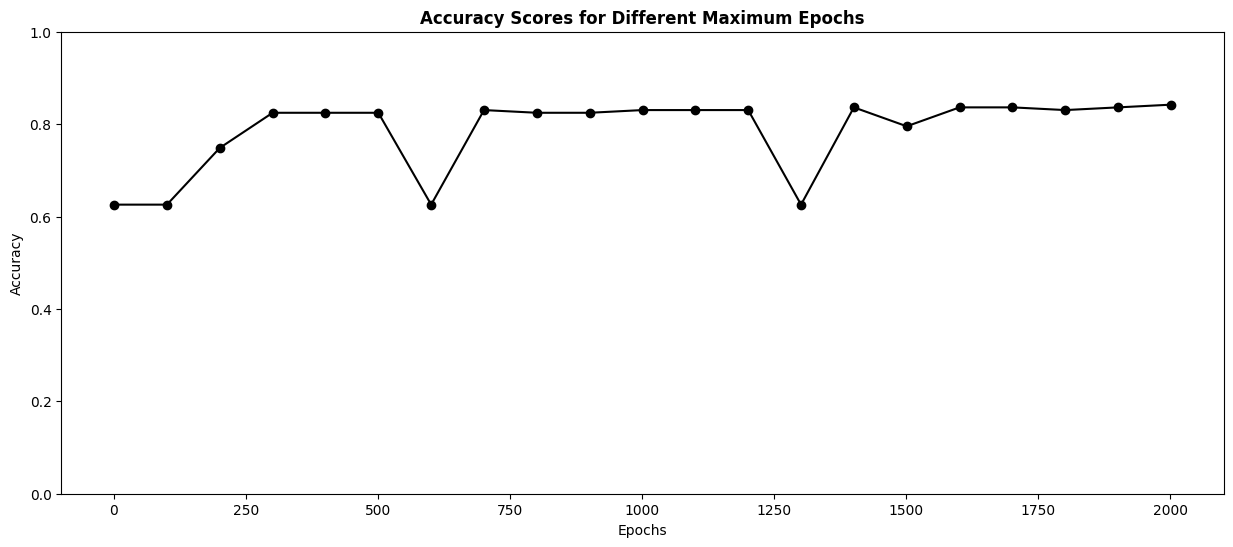

In [77]:
# Plotting the change in accuracy across different maximum epochs
plt.figure(figsize = (15, 6))
plt.plot(epoch_values, accuracy_values_epochs, 'black')
plt.scatter(epoch_values, accuracy_values_epochs, color = 'black')
plt.title("Accuracy Scores for Different Maximum Epochs", fontweight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1)
plt.show()

For very low epoch counts (< 250), the accuracy of the model is low, presumably as a result of insufficient epochs for convergence. As the epoch count increases beyond this, the accuracy remains fairly stable, with little beneficial effect from adding additional epochs. Consequently, we will use 1000 epochs for the remainder of the analysis.

Finally, we explore the effects of varying learning rate on model accuracy.

In [78]:
# Arrays for learning rate and accuracy
learning_rate_values = np.linspace(0.001, 0.50, 20)
accuracy_values_learning_rate = np.full(len(learning_rate_values), np.nan)

# Fitting and scoring the model for each learning rate
for i in range(len(learning_rate_values)):
    mlp = multilayer_Perceptron(layers = [2, 2, 2, 2, 1], epochs = 1000, learning_rate = learning_rate_values[i])
    mlp.fit(train_array, train_targets)
    prob, classes = mlp.prediction(test_array)
    accuracy = accuracy_score(classes.reshape(-1,), test_targets)
    accuracy_values_learning_rate[i] = accuracy

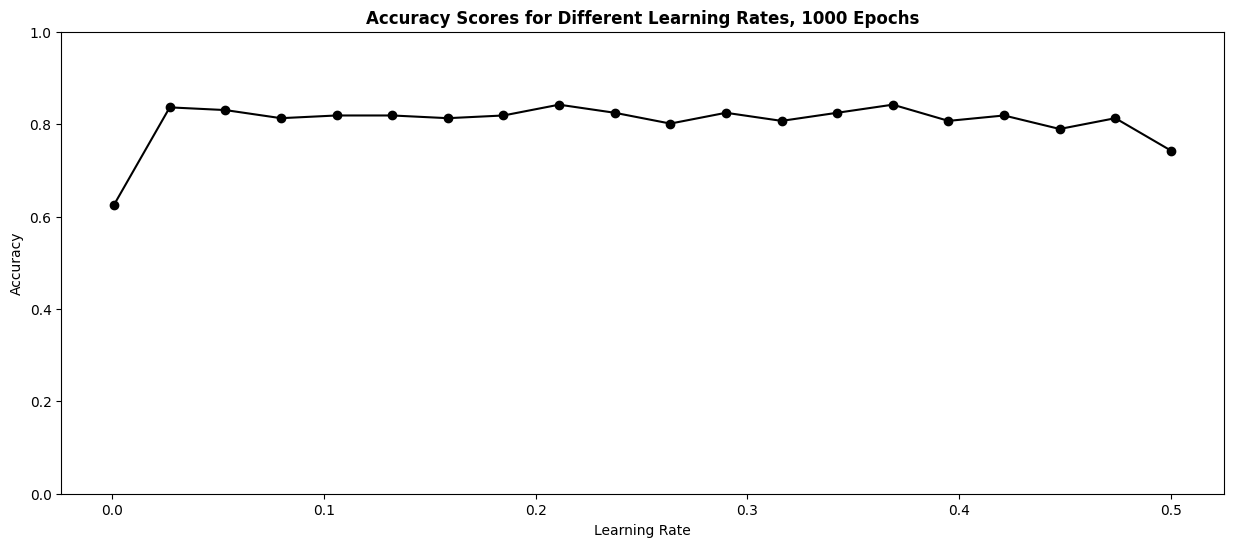

In [79]:
# Plotting the change in accuracy across different learning rates
plt.figure(figsize = (15, 6))
plt.plot(learning_rate_values, accuracy_values_learning_rate, 'black')
plt.scatter(learning_rate_values, accuracy_values_learning_rate, color = 'black')
plt.title("Accuracy Scores for Different Learning Rates, 1000 Epochs", fontweight = 'bold')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1)
plt.show()

At a low learning rate, the model accuracy is also low, likely because 1000 epochs is not sufficient for convergence when the learning rate causes minimal updates each epoch. When the learning rate increases to around 0.05 and beyond, the model accuracy remains consistent, indicating that varying learning rate has a negligible effect on performance after a threshold. We will use the default learning rate of 0.01.

### MLP Implementation (Multiple Features)
*Classification using MLP with multiple (nine) features*

This section implements the custom MLP class to classify tumor type based on the first nine additional numeric features. As before, it carries out the standardization, splitting, model fit, and prediction calculations.

Prior to fitting the MLP model, we normalize the feature data using z-scores for each feature, again calculated using the `preprocess` package. In this case, the first nine features of the data set are normalized and used in the MLP analysis. The data is then split into training (70%) and testing arrays (30%) with the stratification method based on tumor type label. Finally, a new instance of the MLP class is created and fit with the training data, then used to classify samples in the testing data.

This MLP has the following specifications:
- **Layers:** 9, 5, 3, 2, 1
- **Epochs:** 5000 (to align with the sklearn model in the following section)
- **Learning Rate:** 0.01


In [80]:
# Standardizing the data
cancer_data_normal_mult = z_score_standardize(cancer_features[:, 0:9])
print(f"Standardized feature data (first five rows, first five features): \n {cancer_data_normal_mult[0:5, 0:5]}")

Standardized feature data (first five rows, first five features): 
 [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]


In [81]:
# Splitting the data into training and testing arrays
train_array_mult, test_array_mult, train_targets_mult, test_targets_mult = train_test(cancer_data_normal_mult, cancer_status, stratify = cancer_status, random_state = 438)
train_targets_mult = train_targets_mult.reshape(-1, 1)
# Verifying sizes of each array
print(f"Shape of training array: {train_array_mult.shape}")
print(f"Shape of training targets: {train_targets_mult.shape}")
print(f"Shape of testing array: {test_array_mult.shape}")
print(f"Shape of testing targets: {test_targets_mult.shape}")

Shape of training array: (398, 9)
Shape of training targets: (398, 1)
Shape of testing array: (171, 9)
Shape of testing targets: (171,)


In [82]:
# Fitting the model
mlp_mult = multilayer_Perceptron([9, 5, 3, 2, 1], epochs = 5000, learning_rate = 0.01)
mlp_mult.fit(train_array_mult, train_targets_mult)

# Predicting tumor type based on testing data
pred_mult, classes_mult = mlp_mult.prediction(test_array_mult)

Because the model takes in nine features, there is no way to easily visualize the resulting classifications, as was possible with two features. Instead, model evaluation is done only using the confusion matrix and various performance metrics, as well as an error history plot.

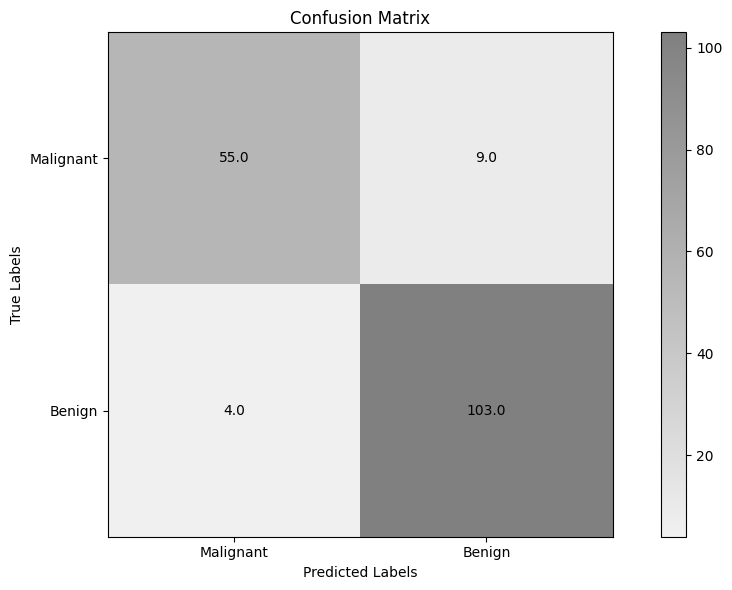

In [83]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(classes_mult.reshape(-1,), test_targets_mult, conf_matrix_labels = ['Malignant', 'Benign'])

In [84]:
# Evaluating model performance on various metrics
print_model_metrics(classes_mult.reshape(-1,), test_targets_mult)
loss = log_loss(pred_mult, test_targets_mult)
print(f"Loss: {loss:.2f}")

Model Metrics 
------------- 
Accuracy: 0.92 
Precision (Micro): 0.92 
Precision (Macro): 0.93 
Recall (Micro): 0.92 
Recall (Macro): 0.91 
F1 (Micro): 0.92 
F1 (Macro): 0.92
Loss: 0.25


This model performs well in classifying tumor type based on the relevant features, with an accuracy of around 92% and similar precision, recall, and F1 scores. The log loss score for this version is 0.21, which is much lower than the two-feature MLP.

We can plot the error history for the multi-feature MLP.

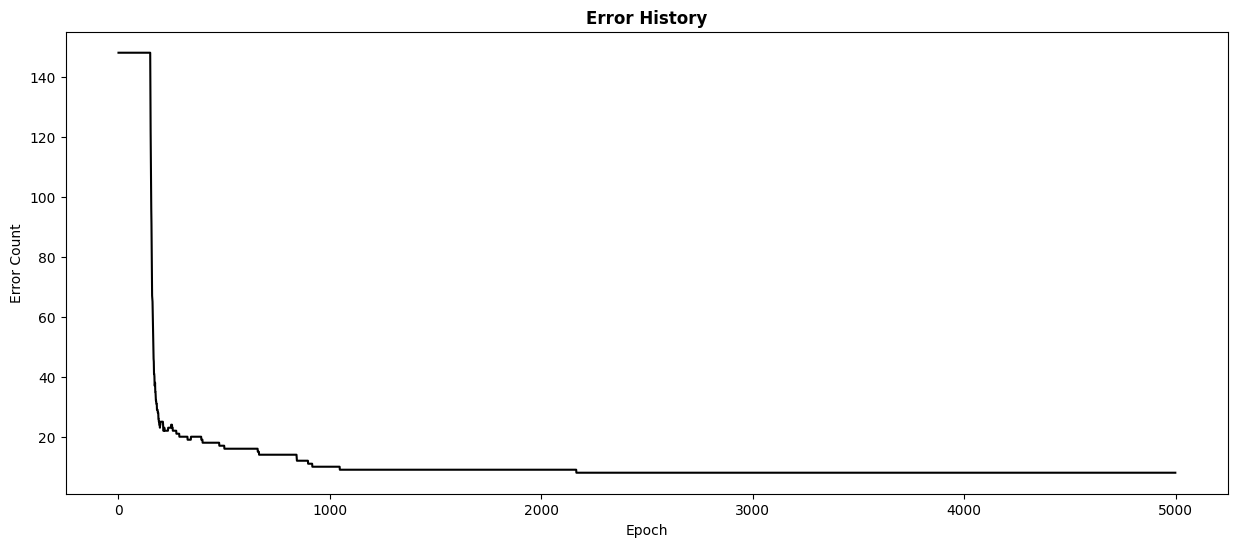

In [85]:
# Plotting the error history
errors_mult = mlp_mult.error_
iteration = np.arange(mlp_mult.epochs)
plt.figure(figsize = (15, 6))
plt.plot(iteration, errors_mult, 'black')
plt.title("Error History", fontweight = 'bold')
plt.xlabel("Epoch")
plt.ylabel("Error Count")
plt.show()

The error history plot for this model is similar to the two-feature one, but requires more epochs for convergence. The error count drops steeply within less than 100 epochs, but plateaus briefly before dropping again until around 500 epochs. Beyond this, it levels out and does not significantly change, indicating that the model has successfully updated the weights to reduce errors. Consequently, the custom MLP has been validated as a reliable classification method for multi-feature problems.

### Comparison with Existing Models
*Comparison with scikit-learn MLP*

In order to ensure that the custom-built MLP is functioning as intended and providing expected results, it is useful to compare its performance to an MLP classifier from established code. In this section, we rerun the analysis with all features using the scikit-learn MLP with a matching number of layers (9, 5, 3, 2) and maximum epochs (5000) to verify the results of the custom MLP.

In [86]:
# Creating an MLP using scikit-learn
from sklearn.neural_network import MLPClassifier
mlp_sk = MLPClassifier(hidden_layer_sizes = (5, 3, 2), max_iter = 5000)
mlp_sk.fit(train_array_mult, train_targets_mult.reshape(-1,))
mlp_sk_classes = mlp_sk.predict(test_array_mult)

In [87]:
# Evaluating model performance on various metrics
print_model_metrics(mlp_sk_classes, test_targets_mult)

Model Metrics 
------------- 
Accuracy: 0.91 
Precision (Micro): 0.91 
Precision (Macro): 0.91 
Recall (Micro): 0.91 
Recall (Macro): 0.90 
F1 (Micro): 0.91 
F1 (Macro): 0.91


The scikit-learn MLP classifier has an accuracy, precision, recall, and F1 score extremely similar to that of the custom-built MLP. Although they are not exactly identical, no discrepancy exists that would suggest the custom MLP is not functioning correctly. Therefore, the custom `rice_ml` MLP is able to handle multi-feature classification problems to a professional standard.